In [67]:
#this function will pass the ior file and return the Max read or write
def maxior(filename, kword):
    import re
    import sys

    file = open(filename, "r")
    for line in file:
        if re.search(kword, line):
              str_line=line.split(" ")
              str_list = filter(None, str_line)
              if kword.split(' ')[0]=="Max":
                    #print filename,str_list[2]
                    return (str_list[2])
              else:
                return str_list[1]

def getread(x):
    for f in x[2]:
        maxior(f,"Max Read")
def getwrite(x):
    for f in x[2]:
        maxior(f,"Max Write")   

In [88]:
dir="/global/homes/j/jialin/heterogeneous-IO/cpu/script/ior/ior_test/tmp_has_per_write"

In [89]:
cd $dir

/global/u1/j/jialin/heterogeneous-IO/cpu/script/ior/ior_test/tmp_has_per_write


In [68]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline 
import os
import numpy as np
def ior_forjob(dir,jobid,keywords,tt,sb=None):
    #print dir
    #print jobid
    xdir=os.listdir(dir)
    #print xdir
    xjob=[x for x in xdir if jobid in x]
    print xjob
    readmax=list()
    writemax=list()
    print "Number of Jobs:%d"%len(xjob)#,xjob
    for x in xjob:
        cur=maxior(x,keywords)
        writemax.append(cur)
    if sb!=None:
        segs=[x.split('.')[2] for x in xjob]
        segs=np.asarray(segs)
    xjob=[x.split('.')[1] for x in xjob] # get job nodes.cores config

    xjob=np.asarray(xjob)
    import pandas as pd
    dfwrite=pd.DataFrame(data=xjob,columns=["setting"],index=None) # construct dataframe
    dfwrite['writemax']=writemax
    if sb !=None:
        dfwrite['seg']=segs
        dfwrite.seg=dfwrite.seg.astype('int')
    #print dfwrite.writemax
    dfwrite.writemax=dfwrite.writemax.astype('float')
    dfwrite=dfwrite[dfwrite.writemax.astype('str') != 'None'] # remove none value
    dfwrite=dfwrite[dfwrite.writemax.astype('str') != 'NaN'] # remove none value
    print "Number of Completed Jobs:%d"%len(dfwrite.writemax)
    dfwrite['nodes'], dfwrite['cores']=dfwrite['setting'].str.split('x', 1).str
    del dfwrite['setting']
    if sb==None:
        print "sort by nodes, cores"
        dfwrite=dfwrite.sort_values(by=['nodes','cores'],axis=0)
    else:
        print "sort by number of segments"
        dfwrite=dfwrite.sort_values(by=['seg'],axis=0)
    dfwrite.nodes=dfwrite.nodes.astype('int')
    dfwrite.cores=dfwrite.cores.astype('int')
    dfwrite['nodecore']=dfwrite.nodes.astype('str')+'-'+dfwrite.cores.astype('str')
    dfwrite=dfwrite.reset_index(drop=True)
    return dfwrite
def ior_plot(dfwrite,keywords,tt):
    plt.xticks(range(len(dfwrite.nodes)),dfwrite.nodecore)
    plt.plot(range(len(dfwrite.nodecore)),dfwrite.writemax,'-o')
    plt.xlabel('Nodes-Cores')
    plt.ylabel('MiB/s')
    plt.title(tt+","+keywords)
    plt.xticks(rotation=80 )
    plt.grid(True)
def ior_plot_two(dfknl,dfhas,tt,step=None,label1=None,label2=None):
    plt.xticks(range(len(dfknl.nodes)),dfknl.nodecore)
    if label1==None:
        label1="KNL"
    plt.plot(range(len(dfknl.nodecore)),dfknl.writemax,'-o',label=label1)
    has_x=range(len(dfhas.nodecore))
    #add gap in has x
    i=6
    while i<= len(has_x):
        j=i # do a shift on every 7th element and its afterwards
        while j < len(has_x):
            if step !=None:
                has_x[j]+=2
            else:
                has_x[j]+=1
            j+=1
        i=i+6
    if label2==None:
        label2="Haswell"
    plt.plot(has_x,dfhas.writemax,'-^',label=label2)
    plt.xlabel('Nodes-Cores')
    plt.ylabel('MiB/s')
    plt.title(tt)
    plt.xticks(rotation=90 )
    plt.grid(True)
    plt.legend()

In [91]:
jobid="4603772"
keyword="Max Write"
tt='Haswell Direct IO, File per Process'
dfhas=ior_forjob(dir,jobid,keyword,tt)
#ior_plot(dfhas,keyword,tt)

['ior-w.0001x02.4603772.out', 'ior-w.0001x01.4603772.out', 'ior-w.0002x08.4603772.out', 'ior-w.0001x04.4603772.out', 'ior-w.0004x16.4603772.out', 'ior-w.0002x32.4603772.out', 'ior-w.0004x02.4603772.out', 'ior-w.0008x32.4603772.out', 'ior-w.0002x04.4603772.out', 'ior-w.0008x01.4603772.out', 'ior-w.0002x02.4603772.out', 'ior-w.0008x08.4603772.out', 'ior-w.0004x04.4603772.out', 'ior-w.0004x01.4603772.out', 'ior-w.0004x08.4603772.out', 'ior-w.0001x08.4603772.out', 'ior-w.0002x01.4603772.out', 'ior-w.0008x16.4603772.out', 'ior-w.0001x16.4603772.out', 'ior-w.0004x32.4603772.out', 'ior-w.0008x02.4603772.out', 'ior-w.0008x04.4603772.out', 'ior-w.0001x32.4603772.out', 'ior-w.0002x16.4603772.out']
Number of Jobs:24
Number of Completed Jobs:24
sort by nodes, cores


In [92]:
jobid="4603792"
keyword="Max Write"
tt='KNL Direct IO, File per Process'
dfknl=ior_forjob(dir,jobid,keyword,tt)
#ior_plot(dfknl,keyword,tt)

['ior-w.0004x32.4603792.out', 'ior-w.0008x01.4603792.out', 'ior-w.0002x08.4603792.out', 'ior-w.0004x01.4603792.out', 'ior-w.0001x04.4603792.out', 'ior-w.0004x08.4603792.out', 'ior-w.0008x64.4603792.out', 'ior-w.0008x02.4603792.out', 'ior-w.0002x64.4603792.out', 'ior-w.0001x08.4603792.out', 'ior-w.0002x02.4603792.out', 'ior-w.0001x16.4603792.out', 'ior-w.0001x64.4603792.out', 'ior-w.0002x32.4603792.out', 'ior-w.0001x02.4603792.out', 'ior-w.0004x64.4603792.out', 'ior-w.0004x02.4603792.out', 'ior-w.0004x04.4603792.out', 'ior-w.0008x16.4603792.out', 'ior-w.0008x08.4603792.out', 'ior-w.0004x16.4603792.out', 'ior-w.0008x32.4603792.out', 'ior-w.0001x32.4603792.out', 'ior-w.0001x01.4603792.out', 'ior-w.0002x01.4603792.out', 'ior-w.0002x04.4603792.out', 'ior-w.0002x16.4603792.out', 'ior-w.0008x04.4603792.out']
Number of Jobs:28
Number of Completed Jobs:28
sort by nodes, cores


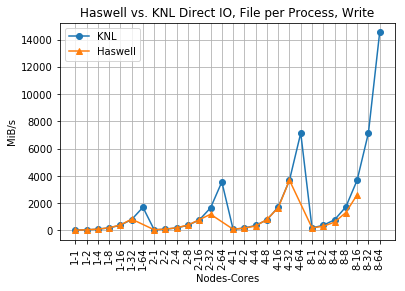

In [93]:
tt='Haswell vs. KNL Direct IO, File per Process, Write'
ior_plot_two(dfknl,dfhas,tt)

In [94]:
dfknl

,writemax,nodes,cores,nodecore
0,23.56,1,1,1-1
1,47.93,1,2,1-2
2,95.71,1,4,1-4
3,190.71,1,8,1-8
4,387.50,1,16,1-16
5,801.56,1,32,1-32
6,1701.82,1,64,1-64
7,48.87,2,1,2-1
8,96.97,2,2,2-2
9,189.02,2,4,2-4


In [95]:
dfhas

,writemax,nodes,cores,nodecore
0,24.05,1,1,1-1
1,51.23,1,2,1-2
2,99.93,1,4,1-4
3,196.95,1,8,1-8
4,404.22,1,16,1-16
5,833.03,1,32,1-32
6,51.80,2,1,2-1
7,98.50,2,2,2-2
8,201.98,2,4,2-4
9,395.94,2,8,2-8


In [8]:
dirr="/global/homes/j/jialin/heterogeneous-IO/cpu/script/ior/ior_test/tmp_has_default_read"

In [9]:
cd $dirr

/global/u1/j/jialin/heterogeneous-IO/cpu/script/ior/ior_test/tmp_has_default_read


In [10]:
jobid="4603772"
keyword="Max Read"
tt='Haswell Direct IO, File per Process'
dfhasr=ior_forjob(dirr,jobid,keyword,tt)
#ior_plot(dfhasr,keyword,tt)

Number of Jobs:23
Number of Completed Jobs:23


In [11]:
jobid="4603792"
keyword="Max Read"
tt='KNL Direct IO, File per Process'
dfknlr=ior_forjob(dirr,jobid,keyword,tt)
#ior_plot(dfknlr,keyword,tt)

Number of Jobs:28
Number of Completed Jobs:27


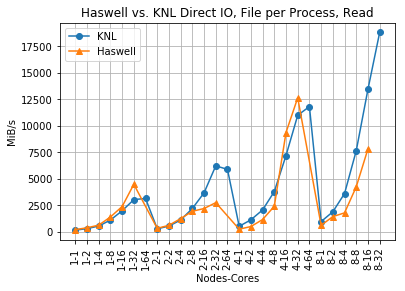

In [12]:
tt='Haswell vs. KNL Direct IO, File per Process, Read'
ior_plot_two(dfknlr,dfhasr,tt)

In [13]:
dir="/global/homes/j/jialin/heterogeneous-IO/cpu/script/ior/ior_test/apr22/apr22write"

In [14]:
cd $dir

/global/u1/j/jialin/heterogeneous-IO/cpu/script/ior/ior_test/apr22/apr22write


In [15]:
jobid="4669220"
keyword="Max Write"
tt='KNL Direct IO, File per Process'
dfknlw=ior_forjob(dir,jobid,keyword,tt)
#ior_plot(dfknlr,keyword,tt)

Number of Jobs:32
Number of Completed Jobs:31


In [16]:
jobid="4669797"
keyword="Max Write"
tt='HASWELL Direct IO, File per Process'
dfhasw=ior_forjob(dir,jobid,keyword,tt)

Number of Jobs:24
Number of Completed Jobs:24


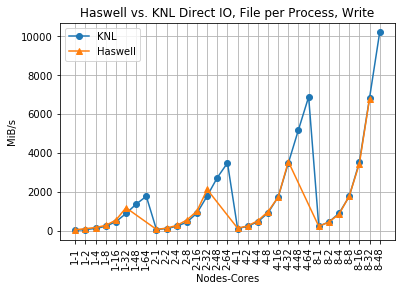

In [17]:
tt='Haswell vs. KNL Direct IO, File per Process, Write'
ior_plot_two(dfknlw,dfhasw,tt,step=2)

In [18]:
dir="/global/homes/j/jialin/heterogeneous-IO/cpu/script/ior/ior_test/apr22/apr22read"

In [19]:
cd $dir

/global/u1/j/jialin/heterogeneous-IO/cpu/script/ior/ior_test/apr22/apr22read


In [20]:
jobid="4669220"
keyword="Max Read"
tt='KNL Direct IO, File per Process'
dfknlr=ior_forjob(dir,jobid,keyword,tt)
#ior_plot(dfknlr,keyword,tt)

Number of Jobs:31
Number of Completed Jobs:31


In [21]:
jobid="4669797"
keyword="Max Read"
tt='HASWELL Direct IO, File per Process'
dfhasr=ior_forjob(dir,jobid,keyword,tt)

Number of Jobs:24
Number of Completed Jobs:24


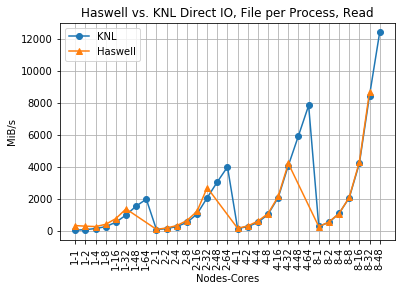

In [22]:
tt='Haswell vs. KNL Direct IO, File per Process, Read'
ior_plot_two(dfknlr,dfhasr,tt,step=2)

In [54]:
dir="/global/homes/j/jialin/heterogeneous-IO/cpu/script/ior/ior_test/apr22/apr22write"

In [55]:
cd $dir

/global/u1/j/jialin/heterogeneous-IO/cpu/script/ior/ior_test/apr22/apr22write


In [61]:
jobid="4669801"
keyword="Max Write"
tt='KNL Direct IO, File per Process'
dfknlw=ior_forjob(dir,jobid,keyword,tt,sb="segment")

['ior-w.0001x01.16.4669801.out', 'ior-w.0001x01.2.4669801.out', 'ior-w.0001x01.4.4669801.out', 'ior-w.0001x01.1.4669801.out', 'ior-w.0001x01.8.4669801.out', 'ior-w.0001x01.32.4669801.out']
Number of Jobs:6
Number of Completed Jobs:6
sort by number of segments


In [62]:
#ior_plot(dfknlr,keyword,tt)

jobid="4669800"
keyword="Max Write"
tt='HASWELL Direct IO, File per Process'
dfhasw=ior_forjob(dir,jobid,keyword,tt,sb="segment")

['ior-w.0001x01.32.4669800.out', 'ior-w.0001x01.2.4669800.out', 'ior-w.0001x01.4.4669800.out', 'ior-w.0001x01.8.4669800.out', 'ior-w.0001x01.16.4669800.out', 'ior-w.0001x01.1.4669800.out']
Number of Jobs:6
Number of Completed Jobs:6
sort by number of segments


In [63]:
dfknlw

,writemax,seg,nodes,cores,nodecore
0,28.43,1,1,1,1-1
1,28.68,2,1,1,1-1
2,28.16,4,1,1,1-1
3,28.02,8,1,1,1-1
4,26.02,16,1,1,1-1
5,NaN,32,1,1,1-1


In [64]:
dfhasw

,writemax,seg,nodes,cores,nodecore
0,63.55,1,1,1,1-1
1,60.36,2,1,1,1-1
2,48.02,4,1,1,1-1
3,29.67,8,1,1,1-1
4,27.60,16,1,1,1-1
5,NaN,32,1,1,1-1


In [65]:
dir="/global/homes/j/jialin/heterogeneous-IO/cpu/script/ior/ior_test/apr22/apr22read"

In [66]:
cd $dir

/global/u1/j/jialin/heterogeneous-IO/cpu/script/ior/ior_test/apr22/apr22read


In [67]:
jobid="4669801"
keyword="Max Read"
tt='KNL Direct IO, File per Process'
dfknlr=ior_forjob(dir,jobid,keyword,tt,sb="segment")

['ior-r.0001x01.16.4669801.out', 'ior-r.0001x01.4.4669801.out', 'ior-r.0001x01.2.4669801.out', 'ior-r.0001x01.1.4669801.out', 'ior-r.0001x01.8.4669801.out']
Number of Jobs:5
Number of Completed Jobs:5
sort by number of segments


In [68]:
jobid="4669800"
keyword="Max Read"
tt='HASWELL Direct IO, File per Process'
dfhasr=ior_forjob(dir,jobid,keyword,tt,sb="segment")

['ior-r.0001x01.16.4669800.out', 'ior-r.0001x01.8.4669800.out', 'ior-r.0001x01.4.4669800.out', 'ior-r.0001x01.2.4669800.out', 'ior-r.0001x01.1.4669800.out']
Number of Jobs:5
Number of Completed Jobs:5
sort by number of segments


In [69]:
dfknlr

,writemax,seg,nodes,cores,nodecore
0,34.19,1,1,1,1-1
1,34.04,2,1,1,1-1
2,34.79,4,1,1,1-1
3,33.31,8,1,1,1-1
4,32.24,16,1,1,1-1


In [70]:
dfhasr

,writemax,seg,nodes,cores,nodecore
0,410.33,1,1,1,1-1
1,469.23,2,1,1,1-1
2,41.40,4,1,1,1-1
3,35.80,8,1,1,1-1
4,33.47,16,1,1,1-1


# On Apr 23, Scratch Performance seems really bad

In [64]:
dir="/global/homes/j/jialin/heterogeneous-IO/cpu/script/ior/ior_test/apr24/apr22read"

# Compare Direct and Buffer IOR, Apr 25

In [65]:
cd $dir

/global/u1/j/jialin/heterogeneous-IO/cpu/script/ior/ior_test/apr24/apr22read


In [69]:
jobid="4685800"
keyword="Max Read"
tt='KNL Direct IO, File per Process'
dfknlr=ior_forjob(dir,jobid,keyword,tt)

['ior-r.0002x64.4685800.out', 'ior-r.0004x64.4685800.out', 'ior-r.0002x02.4685800.out', 'ior-r.0001x04.4685800.out', 'ior-r.0001x01.4685800.out', 'ior-r.0001x02.4685800.out', 'ior-r.0004x02.4685800.out', 'ior-r.0001x48.4685800.out', 'ior-r.0001x16.4685800.out', 'ior-r.0001x64.4685800.out', 'ior-r.0002x01.4685800.out', 'ior-r.0004x08.4685800.out', 'ior-r.0004x16.4685800.out', 'ior-r.0002x32.4685800.out', 'ior-r.0004x01.4685800.out', 'ior-r.0002x16.4685800.out', 'ior-r.0004x32.4685800.out', 'ior-r.0002x08.4685800.out', 'ior-r.0004x48.4685800.out', 'ior-r.0001x32.4685800.out', 'ior-r.0002x48.4685800.out', 'ior-r.0002x04.4685800.out', 'ior-r.0001x08.4685800.out', 'ior-r.0004x04.4685800.out']
Number of Jobs:24
Number of Completed Jobs:24
sort by nodes, cores


In [70]:
jobid="4685784"
keyword="Max Read"
tt='HASWELL Direct IO, File per Process'
dfhasr=ior_forjob(dir,jobid,keyword,tt)

['ior-r.0008x08.4685784.out', 'ior-r.0001x08.4685784.out', 'ior-r.0004x16.4685784.out', 'ior-r.0001x32.4685784.out', 'ior-r.0008x32.4685784.out', 'ior-r.0008x04.4685784.out', 'ior-r.0002x16.4685784.out', 'ior-r.0008x01.4685784.out', 'ior-r.0002x04.4685784.out', 'ior-r.0004x04.4685784.out', 'ior-r.0004x08.4685784.out', 'ior-r.0001x01.4685784.out', 'ior-r.0002x01.4685784.out', 'ior-r.0004x01.4685784.out', 'ior-r.0008x02.4685784.out', 'ior-r.0001x04.4685784.out', 'ior-r.0004x32.4685784.out', 'ior-r.0004x02.4685784.out', 'ior-r.0001x02.4685784.out', 'ior-r.0002x02.4685784.out', 'ior-r.0008x16.4685784.out', 'ior-r.0002x32.4685784.out', 'ior-r.0001x16.4685784.out', 'ior-r.0002x08.4685784.out']
Number of Jobs:24
Number of Completed Jobs:24
sort by nodes, cores


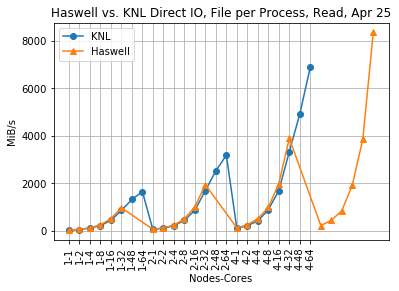

In [71]:
tt='Haswell vs. KNL Direct IO, File per Process, Read, Apr 25'
ior_plot_two(dfknlr,dfhasr,tt,step=2)

In [72]:
jobid="4685871"
keyword="read"
tt='KNL Buffered IO, File per Process,'
dfknlbr=ior_forjob(dir,jobid,keyword,tt)
keyword="Max Read"
tt='KNL Buffered IO, File per Process,'
dfknlbrmax=ior_forjob(dir,jobid,keyword,tt)

['ior-r.0002x04.4685871.out', 'ior-r.0001x48.4685871.out', 'ior-r.0002x64.4685871.out', 'ior-r.0008x04.4685871.out', 'ior-r.0002x32.4685871.out', 'ior-r.0002x01.4685871.out', 'ior-r.0004x16.4685871.out', 'ior-r.0004x02.4685871.out', 'ior-r.0004x32.4685871.out', 'ior-r.0008x32.4685871.out', 'ior-r.0001x08.4685871.out', 'ior-r.0001x64.4685871.out', 'ior-r.0002x08.4685871.out', 'ior-r.0004x01.4685871.out', 'ior-r.0004x04.4685871.out', 'ior-r.0002x02.4685871.out', 'ior-r.0001x32.4685871.out', 'ior-r.0004x08.4685871.out', 'ior-r.0004x48.4685871.out', 'ior-r.0002x48.4685871.out', 'ior-r.0008x01.4685871.out', 'ior-r.0008x16.4685871.out', 'ior-r.0001x02.4685871.out', 'ior-r.0008x48.4685871.out', 'ior-r.0004x64.4685871.out', 'ior-r.0008x64.4685871.out', 'ior-r.0002x16.4685871.out', 'ior-r.0001x01.4685871.out', 'ior-r.0001x16.4685871.out', 'ior-r.0008x02.4685871.out', 'ior-r.0008x08.4685871.out', 'ior-r.0001x04.4685871.out']
Number of Jobs:32
Number of Completed Jobs:32
sort by nodes, cores
['io

In [73]:
jobid="4685865"
keyword="read"
tt='HASWELL Buffered IO, File per Process,'
dfhasbr=ior_forjob(dir,jobid,keyword,tt)
keyword="Max Read"
tt='HASWELL Buffered IO, File per Process,'
dfhasbrmax=ior_forjob(dir,jobid,keyword,tt)

['ior-r.0001x32.4685865.out', 'ior-r.0004x02.4685865.out', 'ior-r.0002x08.4685865.out', 'ior-r.0001x08.4685865.out', 'ior-r.0004x16.4685865.out', 'ior-r.0008x32.4685865.out', 'ior-r.0001x01.4685865.out', 'ior-r.0002x01.4685865.out', 'ior-r.0002x04.4685865.out', 'ior-r.0002x32.4685865.out', 'ior-r.0001x04.4685865.out', 'ior-r.0002x16.4685865.out', 'ior-r.0008x01.4685865.out', 'ior-r.0002x02.4685865.out', 'ior-r.0001x16.4685865.out', 'ior-r.0008x16.4685865.out', 'ior-r.0004x08.4685865.out', 'ior-r.0004x32.4685865.out', 'ior-r.0004x01.4685865.out', 'ior-r.0008x04.4685865.out', 'ior-r.0001x02.4685865.out', 'ior-r.0008x08.4685865.out', 'ior-r.0004x04.4685865.out', 'ior-r.0008x02.4685865.out']
Number of Jobs:24
Number of Completed Jobs:24
sort by nodes, cores
['ior-r.0001x32.4685865.out', 'ior-r.0004x02.4685865.out', 'ior-r.0002x08.4685865.out', 'ior-r.0001x08.4685865.out', 'ior-r.0004x16.4685865.out', 'ior-r.0008x32.4685865.out', 'ior-r.0001x01.4685865.out', 'ior-r.0002x01.4685865.out', 'io

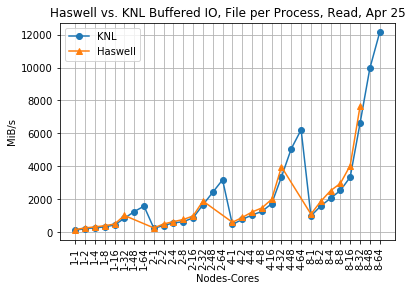

In [74]:
tt='Haswell vs. KNL Buffered IO, File per Process, Read, Apr 25'
ior_plot_two(dfknlbr,dfhasbr,tt,step=2)

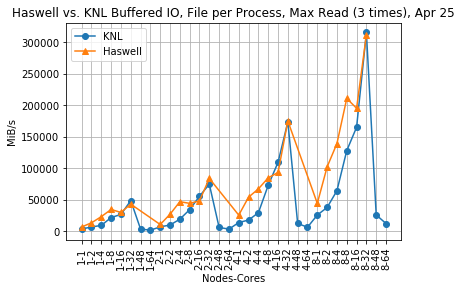

In [75]:
tt='Haswell vs. KNL Buffered IO, File per Process, Max Read (3 times), Apr 25'
ior_plot_two(dfknlbrmax,dfhasbrmax,tt,step=2)

# "Haswell has better page buffer management than KNL” based on these results.

In [33]:
dir="/global/homes/j/jialin/heterogeneous-IO/cpu/script/ior/ior_test/apr24/apr22write"

In [34]:
cd $dir

/global/u1/j/jialin/heterogeneous-IO/cpu/script/ior/ior_test/apr24/apr22write


In [ ]:
jobid="4685800"
keyword="Max Write"
tt='KNL Direct IO, File per Process'
dfknlw=ior_forjob(dir,jobid,keyword,tt)
jobid="4685784"
keyword="Max Write"
tt='HASWELL Direct IO, File per Process'
dfhasw=ior_forjob(dir,jobid,keyword,tt)
tt='Haswell vs. KNL Direct IO, File per Process, Write, Apr 25'


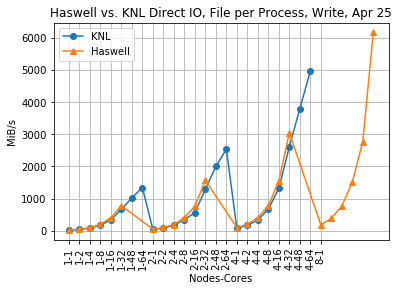

In [37]:
ior_plot_two(dfknlw,dfhasw,tt,step=2)

In [ ]:
jobid="4685871"
keyword="write"
tt='KNL Buffered IO, File per Process,'
dfknlbw=ior_forjob(dir,jobid,keyword,tt)
keyword="Max Write"
tt='KNL Buffered IO, File per Process,'
dfknlbwmax=ior_forjob(dir,jobid,keyword,tt)

jobid="4685865"
keyword="write"
tt='HASWELL Buffered IO, File per Process,'
dfhasbw=ior_forjob(dir,jobid,keyword,tt)
keyword="Max Write"
tt='HASWELL Buffered IO, File per Process,'
dfhasbwmax=ior_forjob(dir,jobid,keyword,tt)


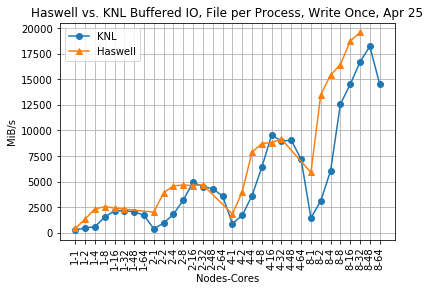

In [41]:
tt='Haswell vs. KNL Buffered IO, File per Process, Write Once, Apr 25'
ior_plot_two(dfknlbw,dfhasbw,tt,step=2)

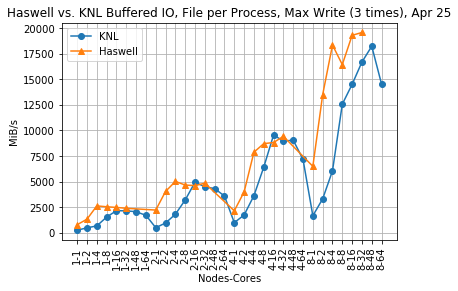

In [42]:
tt='Haswell vs. KNL Buffered IO, File per Process, Max Write (3 times), Apr 25'
ior_plot_two(dfknlbwmax,dfhasbwmax,tt,step=2)

# Compare Direct IO and Buffered IO, Write Once

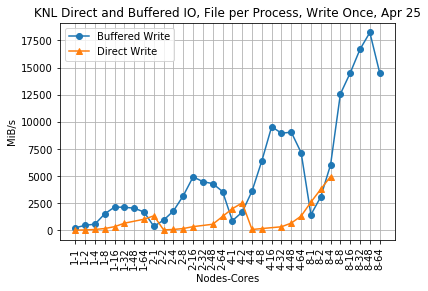

In [48]:
tt='KNL Direct and Buffered IO, File per Process, Write Once, Apr 25'
ior_plot_two(dfknlbw,dfknlw,tt,label1="Buffered Write", label2="Direct Write")

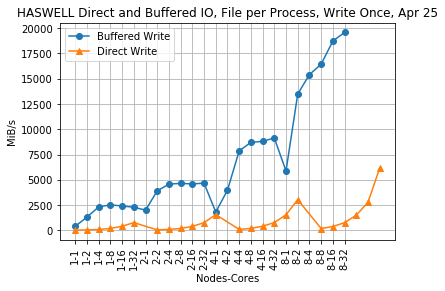

In [49]:
tt='HASWELL Direct and Buffered IO, File per Process, Write Once, Apr 25'
ior_plot_two(dfhasbw,dfhasw,tt,label1="Buffered Write", label2="Direct Write")

# Compare Direct IO and Buffered IO, Read Once

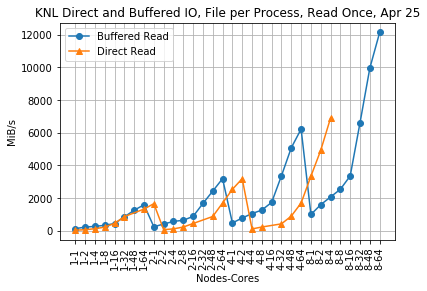

In [76]:
tt='KNL Direct and Buffered IO, File per Process, Read Once, Apr 25'
ior_plot_two(dfknlbr,dfknlr,tt,label1="Buffered Read", label2="Direct Read")

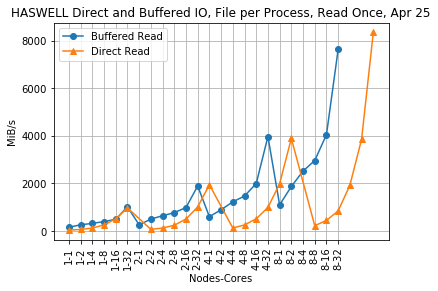

In [77]:
tt='HASWELL Direct and Buffered IO, File per Process, Read Once, Apr 25'
ior_plot_two(dfhasbr,dfhasr,tt,label1="Buffered Read", label2="Direct Read")

# Weird thing: why Buffered Read is better than Direct Read